In [2]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`
import org.apache.spark.sql._

import $ivy.$                                  

import org.apache.spark.sql._

In [4]:
import $ivy.`org.apache.spark::spark-streaming:2.4.3`

import $ivy.$                                        

In [3]:
import org.apache.spark.streaming.{Seconds, StreamingContext}

import org.apache.spark.streaming.{Seconds, StreamingContext}

Usually you want to disable logging in order to avoid polluting your cell outputs.

In [5]:
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)

import org.apache.log4j.{Level, Logger}


In [6]:
val spark = {
  SparkSession.builder()
    .master("local[*]")
    .getOrCreate()
}

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


spark: SparkSession = org.apache.spark.sql.SparkSession@706ce512

In [7]:
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types._


import org.apache.spark.sql.functions._

import org.apache.spark.sql.types._


In [8]:
     val schema = new StructType()
       .add("UserName", StringType)
       .add("IdealTime", IntegerType)
       .add("ArrivalTime", TimestampType)
       .add("LeavingTime", TimestampType)
       .add("WorkingTime", DoubleType)
       .add("WorkingHours", DoubleType)
       .add("IdleTime", DoubleType)

schema: StructType = StructType(
  StructField("UserName", StringType, true, {}),
  StructField("IdealTime", IntegerType, true, {}),
  StructField("ArrivalTime", TimestampType, true, {}),
  StructField("LeavingTime", TimestampType, true, {}),
  StructField("WorkingTime", DoubleType, true, {}),
  StructField("WorkingHours", DoubleType, true, {}),
  StructField("IdleTime", DoubleType, true, {})
)

In [10]:
val csvDF = spark
       .read.format("csv")
      .option("header", false)
      .option("timestampFormat", "HH:mm:ss")
      .schema(schema)
      .load("raw/work3.csv")


/*.read  
  .schema(schema)
  .csv("raw\\work1.csv")
*/

csvDF: DataFrame = [UserName: string, IdealTime: int ... 5 more fields]

In [11]:
csvDF.show()

+--------------------+---------+-------------------+-------------------+-----------+------------+--------+
|            UserName|IdealTime|        ArrivalTime|        LeavingTime|WorkingTime|WorkingHours|IdleTime|
+--------------------+---------+-------------------+-------------------+-----------+------------+--------+
|giridhardandikwar...|      200|1970-01-01 09:09:20|1970-01-01 07:19:35|      10.55|        7.35|     3.2|
|umangsontakke70@g...|       55|1970-01-01 09:09:25|1970-01-01 07:19:35|       11.0|       10.05|    0.55|
|indrajeetgajbhiye...|      125|1970-01-01 09:09:00|1970-01-01 07:19:15|      10.15|         8.1|    2.05|
|adikumar2514@gmai...|      385|1970-01-01 09:09:20|1970-01-01 07:19:20|       10.4|        4.15|    6.25|
| dileep.bs@yahoo.com|       70|1970-01-01 09:09:20|1970-01-01 07:19:30|       10.5|         9.4|     1.1|
|puruissimple@gmai...|       45|1970-01-01 09:09:05|1970-01-01 07:19:25|       10.3|        9.45|    0.45|
|nehapalekar026@gm...|      120|1970-

In [17]:
import spark.implicits._
val names = csvDF.select("UserName").map(_.getString(0)).collect.toList


import spark.implicits._

names: List[String] = List(
  "giridhardandikwar@gmail.com",
...

In [21]:
val WorkingTime = csvDF.select("WorkingTime").map(_.getDouble(0)).collect.toList

WorkingTime: List[Double] = List(
  10.55,
...

In [22]:

val WorkingHours = csvDF.select("WorkingHours").map(_.getDouble(0)).collect.toList

WorkingHours: List[Double] = List(
  7.35,
...

In [45]:

val IdleTime = csvDF.select("IdleTime").map(_.getDouble(0)).collect.toList

IdleTime: List[Double] = List(
  3.2,
...

In [24]:
import $ivy.`org.plotly-scala::plotly-almond:0.7.1`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._



import $ivy.$                                      

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._



In [53]:
val scale: List[Int] = WorkingHours.map (_.toInt)

scale: List[Int] = List(
  7,
  10,
  8,
...

In [54]:
val trace6 = Scatter(
  names,
    WorkingHours,
  mode = ScatterMode(ScatterMode.Markers),
  marker = Marker(
    size = scale
  )
)


trace6: Scatter = Scatter(
  Some(
    Strings(
      List(
...

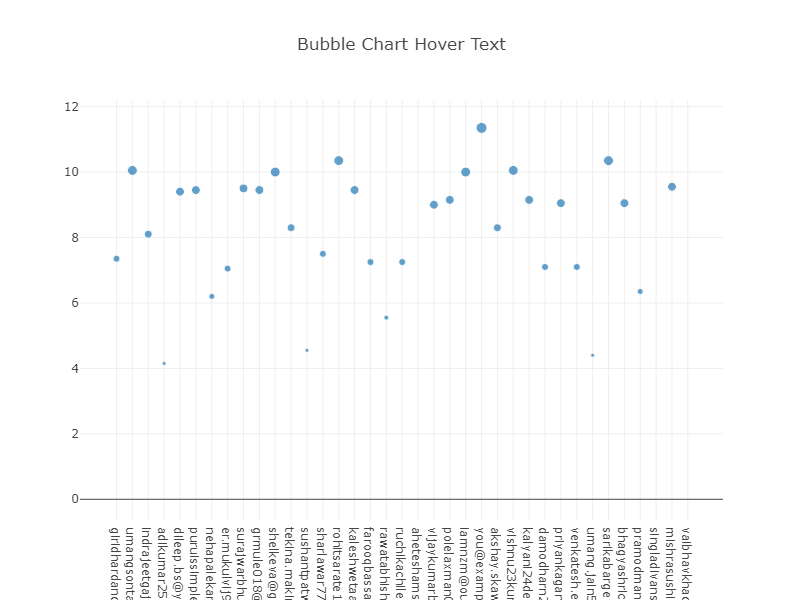

data: Seq[Scatter] = List(
  Scatter(
    Some(
      Strings(
...
layout: Layout = Layout(
  Some("Bubble Chart Hover Text"),
  None,
  Some(600),
...
res54_2: String = "plot-ac62d474-76c0-4c29-96e8-bb9269b20ca3"

In [55]:
val data = Seq(trace6)

val layout = Layout(
  title = "Bubble Chart Hover Text",
  showlegend = false,
  height = 600,
  width = 600
)

plot(data, layout)

In [48]:
val trace4 = Bar(
  WorkingHours,
  names,
  name = "work",
  orientation = Orientation.Horizontal,
  marker = Marker(
    color = Color.RGBA(55, 128, 191, 0.6),
    width = 1
  )
)



trace4: Bar = Bar(
  Doubles(
...

In [49]:
val trace5 = Bar(
  IdleTime,
  names,
  name = "Idle",
  orientation = Orientation.Horizontal,
  marker = Marker(
    color = Color.RGBA(255, 153, 51, 0.6),
    width = 1
  )
)



trace5: Bar = Bar(
  Doubles(
...

In [51]:
repl.pprinter() = repl.pprinter().copy(defaultHeight = 5)

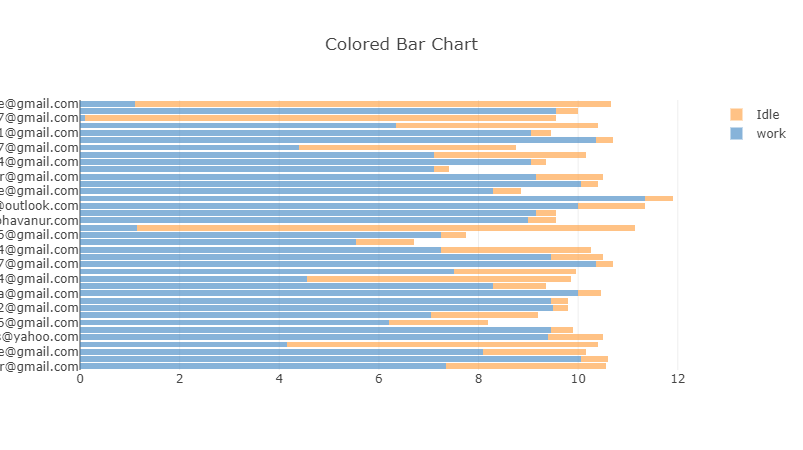

data: Seq[Bar] = List(
  Bar(
    Doubles(
      List(
...
layout: Layout = Layout(
  Some("Colored Bar Chart"),
  None,
  None,
...
res51_2: String = "plot-2f0d0d01-e49c-4d72-be34-fdb9c74a8534"

In [52]:
val data = Seq(trace4, trace5)

val layout = Layout(
  title = "Colored Bar Chart",
  barmode = BarMode.Stack
)

plot(data, layout)

In [41]:
val trace1 = Scatter(
  names,
  WorkingTime,
  mode = ScatterMode(ScatterMode.Lines)
)

trace1: Scatter = Scatter(
  Some(
...

In [42]:
val trace2 = Scatter(
  names,
   WorkingHours,
  mode = ScatterMode(ScatterMode.Lines)
)


trace2: Scatter = Scatter(
  Some(
...

In [46]:

val trace3 = Scatter(
  names,
  IdleTime,
  mode = ScatterMode(ScatterMode.Lines, ScatterMode.Lines)
)


trace3: Scatter = Scatter(
  Some(
...

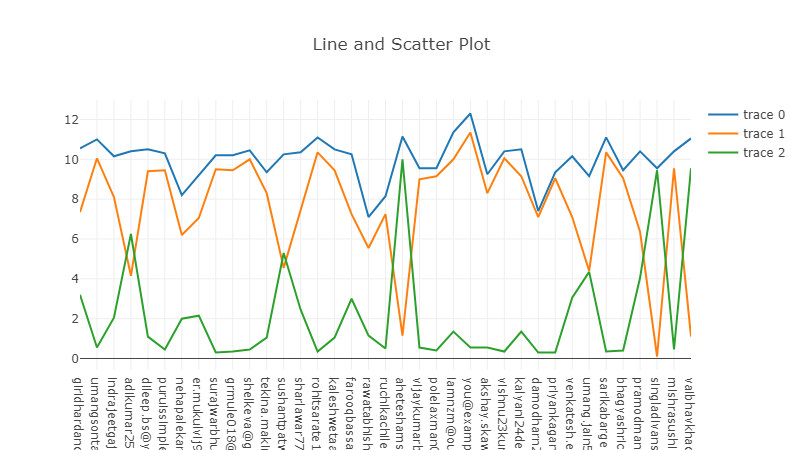

data: Seq[Scatter] = List(
  Scatter(
...
layout: Layout = Layout(
  Some("Line and Scatter Plot"),
...
res46_2: String = "plot-8a57f619-b3af-4c1c-9357-0fdad8c491b7"

In [47]:

val data = Seq(trace1,trace2, trace3)

val layout = Layout(
  title = "Line and Scatter Plot"
)

plot(data, layout)

In [12]:
val stream = spark.readStream
  .schema(schema)
  .csv("raw/")

stream: DataFrame = [UserName: string, IdealTime: int ... 5 more fields]

In [ ]:
val query = stream
 .writeStream 
 .format("csv") 
 .option("format", "append")
  .option("path", "output") 
 .option("checkpointLocation", "checks") 
 .outputMode("append") 
 .start()
spark.streams.awaitAnyTermination()
  